<a href="https://colab.research.google.com/github/asdf1027/knu_bdna_2022.1801311/blob/main/%EA%B9%80%ED%98%84%EC%8B%9D_6%EA%B0%957%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 6강
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [4]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()
# titanic이 아니라 df_train으로 써서 출력

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.shape

(891, 12)

In [8]:
df_test.shape

(418, 11)

In [9]:
df_train['Age'].isnull().sum()

177

In [10]:
100*df_train['Age'].isnull().sum()/df_train[df_train.columns].shape[0]

19.865319865319865

In [11]:
for col in df_train.columns:
  msg='{:>10}:\t Percentage of Nan:{:2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

PassengerId:	 Percentage of Nan:0.000000%
  Survived:	 Percentage of Nan:0.000000%
    Pclass:	 Percentage of Nan:0.000000%
      Name:	 Percentage of Nan:0.000000%
       Sex:	 Percentage of Nan:0.000000%
       Age:	 Percentage of Nan:19.865320%
     SibSp:	 Percentage of Nan:0.000000%
     Parch:	 Percentage of Nan:0.000000%
    Ticket:	 Percentage of Nan:0.000000%
      Fare:	 Percentage of Nan:0.000000%
     Cabin:	 Percentage of Nan:77.104377%
  Embarked:	 Percentage of Nan:0.224467%


In [12]:
import missingno as msno
import matplotlib.pyplot as plt

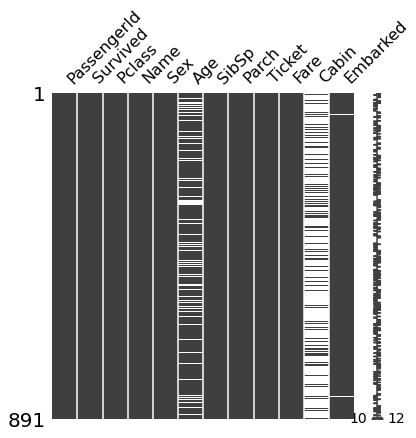

In [13]:
msno.matrix(df=df_train,figsize=(6,6))
plt.show()
# msno.matrix를 사용

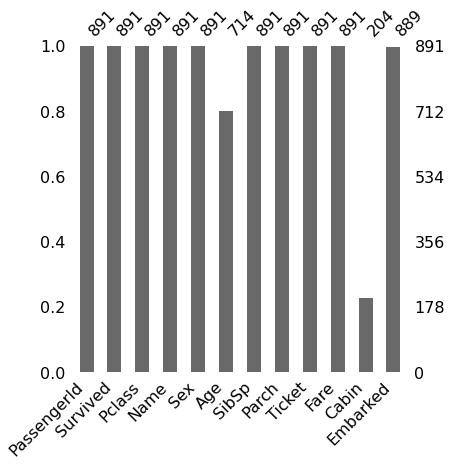

In [14]:
msno.bar(df=df_train,figsize=(6,6))
plt.show()
# msno.bar를 사용

In [15]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

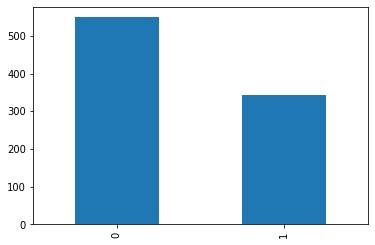

In [16]:
df_train['Survived'].value_counts().plot.bar()

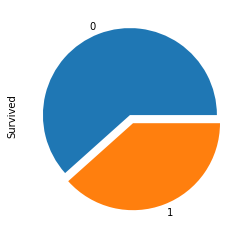

In [17]:
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1])
plt.show()

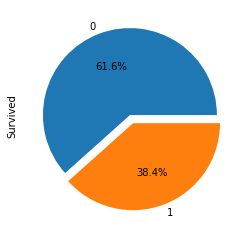

In [18]:
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()

In [19]:
import seaborn as sns

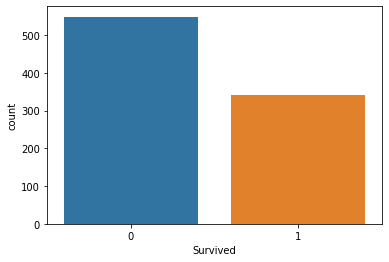

In [20]:
sns.countplot(x='Survived',data=df_train)
plt.show()

In [21]:
df_train[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values

<bound method DataFrame.sort_values of         Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363>

In [24]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [27]:
pd.crosstab(df_train['Pclass'],df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [28]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [40]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [41]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


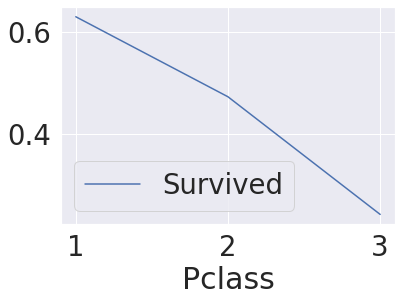

In [42]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot()

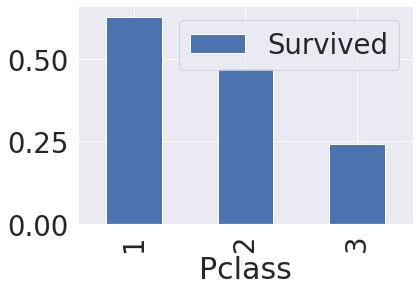

In [43]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()
plt.show()

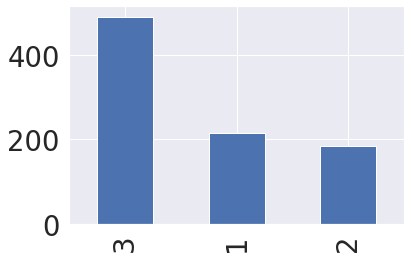

In [44]:
df_train['Pclass'].value_counts().plot.bar()
plt.show()

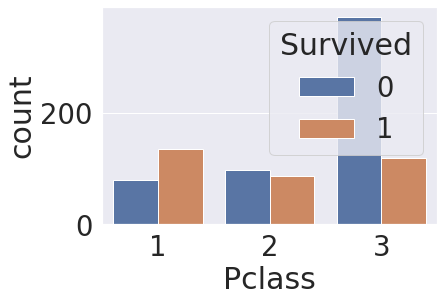

In [45]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)
plt.show()

In [46]:
sns.set(font_scale=2.5)

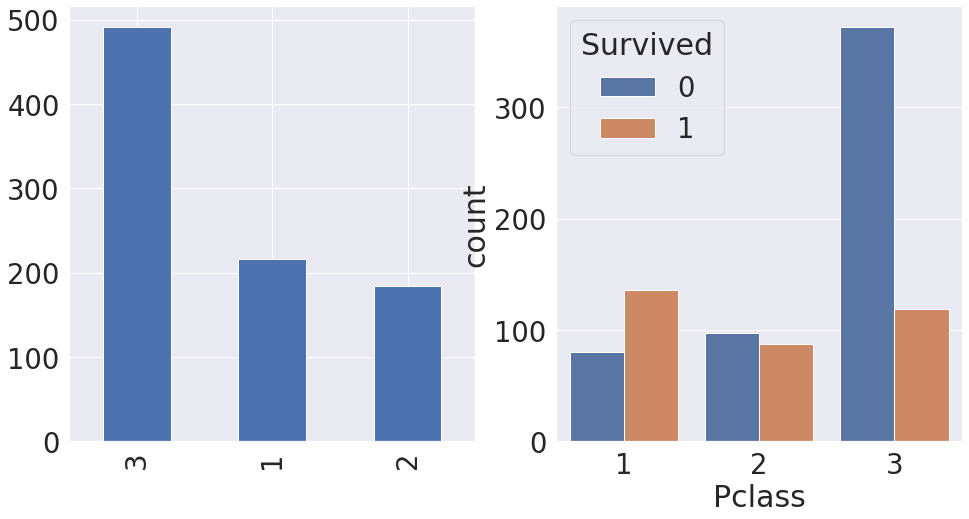

In [47]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
sns.countplot(x='Pclass',hue='Survived',data=df_train,ax=ax[1])
plt.show()
# subplot을 사용하면 두개의 그래프를 출력할 수 있음

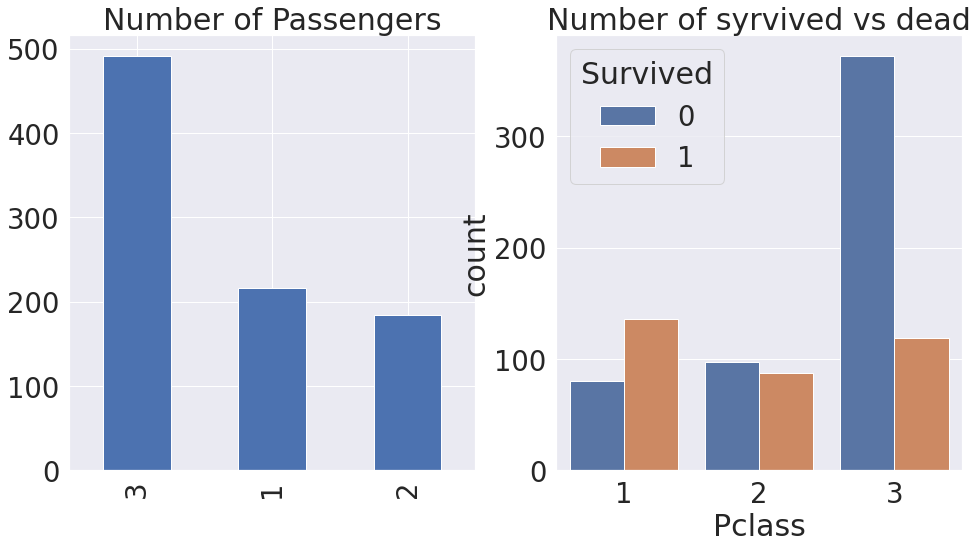

In [48]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers')
sns.countplot(x='Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Number of syrvived vs dead')
plt.show()
# subplot을 사용하면 두개의 그래프를 출력할 수 있음

In [49]:
# 7강

In [57]:
titanic=sns.load_dataset('titanic')
# titanic 데이터

In [58]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
tips=sns.load_dataset('tips')
# tips 데이터

In [60]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
iris=sns.load_dataset('iris')
# iris 데이터

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
x=np.random.rand(100)
eps=np.random.rand(100)/1.5
y=3*x+1+eps

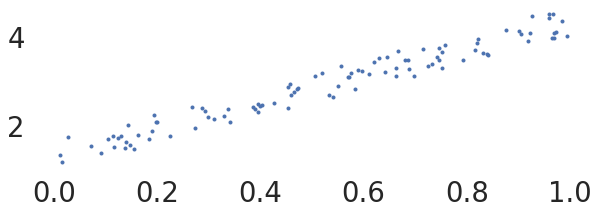

In [99]:
plt.figure(figsize=(10,3))
plt.grid(False)
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(x,y,'.')
plt.show()
# plt.grid(False)를 하면 그래프에 실선이 나타나지 않고 True로 바꾸게 되면 실선이 다시 생김
# plt.rcParams['axes.facecolor'] = 'w'를 하면 그래프 바탕색이 흰색으로 바뀜

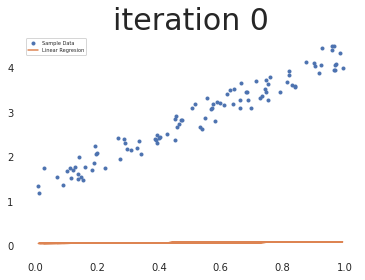

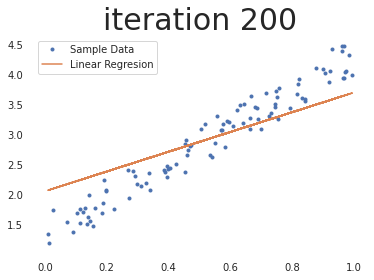

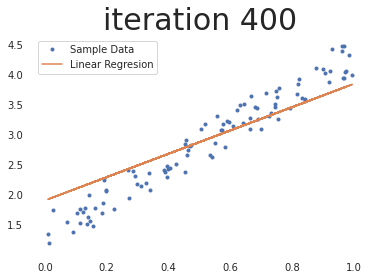

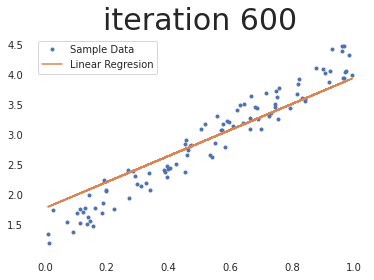

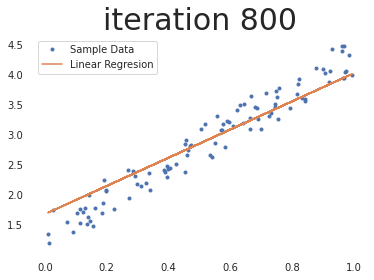

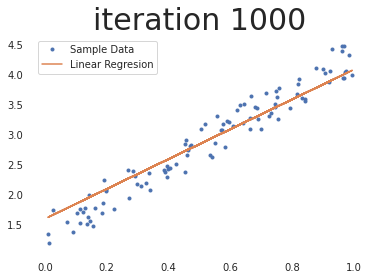

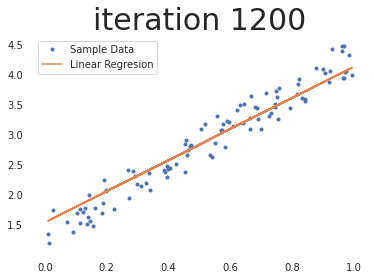

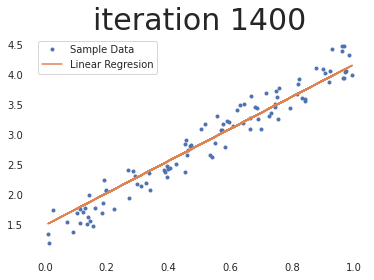

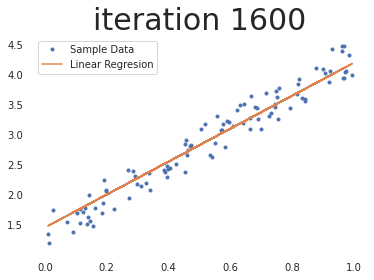

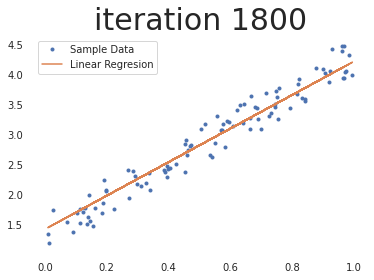

In [135]:
a=0
b=0
alpha=0.01
n=100
err_evolve=[]
it_index=[]

for it in range(2000):
  delta_a=0
  delta_b=0
  err=0
  
  for i in range(n):
    delta_a=delta_a+2*(a*x[i]+b-y[i])*x[i]
    delta_b=delta_b+2*(a*x[i]+b-y[i])
    err=err+(a*x[i]+b-y[i])*(a*x[i]++b-y[i])/n
  
  a=a-alpha*delta_a/n
  b=b-alpha*delta_b/n

  err_evolve.append(err)
  it_index.append(it)

  if it%200==0:
    plt.plot(x,y,'.',x,a*x+b)
    plt.legend(labels=('Sample Data','Linear Regresion'))
    plt.title('iteration %d'%it)
    plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
    plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
    plt.rc('legend', fontsize=10)  # 범례 폰트 크기
    plt.show()

# 경사 하강법

In [137]:
a

2.8520622899862187

In [138]:
b

1.3939508969519463

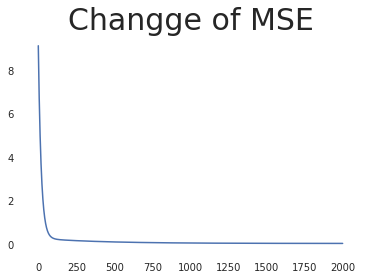

In [148]:
plt.plot(it_index,err_evolve)
plt.title('Changge of MSE')
plt.show()
# 경사하강법 - 에러의 변화

In [168]:
!pip3 install sklearn

In [173]:
from sklearn.datasets import make_regression
x,y,coeff=make_regression(n_samples=200,n_features=1,bias=10,noise=50,coef=True,random_state=1)

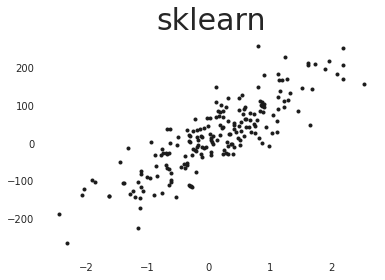

In [175]:
plt.plot(x,y,'k.')
plt.title('sklearn')
plt.show()
# sklearn을 사용해 그래프 출력

In [176]:
from sklearn.linear_model import LinearRegression

In [185]:
model=LinearRegression(fit_intercept=True)
model=model.fit(x,y)
# LinearRegression 모델 만든 후 학습

In [186]:
model.coef_

array([89.01678804])

In [187]:
model.intercept_

8.95754344934731

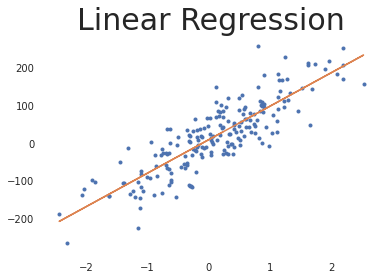

In [188]:
y_pred=model.predict(x)
plt.plot(x,y,'.',x,y_pred)
plt.title('Linear Regression')
plt.show()
# LinearRegression 결과 그래프 출력